## Problem Statement. 

The Bank operates in 3 different countries in Europe namely; France, Spain and Germany. The bank is experiencing customer attrition (customer leaving) and needs to understand the underlying factors contributing to customer churn (customers going to other banks that perform the same operation. The goal is to analyze customer demographic (these are measurable traits and characteristics used by companies to attract customers these include age, income, gender, understanding the bank demographics will help them make better personalized marketing strategies and improve their banking offerings or services or product offering  to better meet customer needs) , financial, and engagement data to identify patterns that distinguish loyal customers from those who leave. This analysis will support the development of targeted strategies for improving customer retention, engagement, and overall satisfaction. 

In short: 
 "Why are customers leaving the bank, and what can be done to reduce churn and improve customer engagement?" 

 ## Objectives.
 
- Merge the data for customers and account information.

- Examine and Profile the data.

- Prepare for visualization.

- Draw conclusions and recommendation.

 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 

In [2]:
customer_df = pd.read_csv('datasource/Bank_Churn_Messy.xlsx - Customer_Info.csv', sep= ',') 
account_df = pd.read_csv('datasource/Bank_Churn_Messy.xlsx - Account_Info.csv') 


Data profiling. 

In [3]:
customer_df.head

<bound method NDFrame.head of        CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0        15634602   Hargrave          619       FRA  Female  42.0       2   
1        15647311       Hill          608     Spain  Female  41.0       1   
2        15619304       Onio          502    French  Female  42.0       8   
3        15701354       Boni          699       FRA  Female  39.0       1   
4        15737888   Mitchell          850     Spain  Female  43.0       2   
...           ...        ...          ...       ...     ...   ...     ...   
9996     15569892  Johnstone          516    French    Male  35.0      10   
9997     15584532        Liu          709       FRA  Female  36.0       7   
9998     15682355  Sabbatini          772   Germany    Male  42.0       3   
9999     15628319     Walker          792    French  Female  28.0       4   
10000    15628319     Walker          792    French  Female  28.0       4   

      EstimatedSalary  
0          €101348.88

In [4]:
customer_df.tail 

<bound method NDFrame.tail of        CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0        15634602   Hargrave          619       FRA  Female  42.0       2   
1        15647311       Hill          608     Spain  Female  41.0       1   
2        15619304       Onio          502    French  Female  42.0       8   
3        15701354       Boni          699       FRA  Female  39.0       1   
4        15737888   Mitchell          850     Spain  Female  43.0       2   
...           ...        ...          ...       ...     ...   ...     ...   
9996     15569892  Johnstone          516    French    Male  35.0      10   
9997     15584532        Liu          709       FRA  Female  36.0       7   
9998     15682355  Sabbatini          772   Germany    Male  42.0       3   
9999     15628319     Walker          792    French  Female  28.0       4   
10000    15628319     Walker          792    French  Female  28.0       4   

      EstimatedSalary  
0          €101348.88

In [5]:
account_df.head

<bound method NDFrame.head of        CustomerId     Balance  NumOfProducts HasCrCard  Tenure IsActiveMember  \
0        15634602        €0.0              1       Yes       2            Yes   
1        15634602        €0.0              1       Yes       2            Yes   
2        15647311   €83807.86              1       Yes       1            Yes   
3        15619304   €159660.8              3        No       8             No   
4        15701354        €0.0              2        No       1             No   
...           ...         ...            ...       ...     ...            ...   
9997     15569892   €57369.61              1       Yes      10            Yes   
9998     15584532        €0.0              1       Yes       7            Yes   
9999     15682355   €75075.31              2        No       3             No   
10000    15628319  €130142.79              1        No       4             No   
10001    15628319  €130142.79              1        No       4             No  

In [6]:
account_df.tail

<bound method NDFrame.tail of        CustomerId     Balance  NumOfProducts HasCrCard  Tenure IsActiveMember  \
0        15634602        €0.0              1       Yes       2            Yes   
1        15634602        €0.0              1       Yes       2            Yes   
2        15647311   €83807.86              1       Yes       1            Yes   
3        15619304   €159660.8              3        No       8             No   
4        15701354        €0.0              2        No       1             No   
...           ...         ...            ...       ...     ...            ...   
9997     15569892   €57369.61              1       Yes      10            Yes   
9998     15584532        €0.0              1       Yes       7            Yes   
9999     15682355   €75075.31              2        No       3             No   
10000    15628319  €130142.79              1        No       4             No   
10001    15628319  €130142.79              1        No       4             No  

In [7]:
customer_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'EstimatedSalary'],
      dtype='object')

In [8]:
account_df.columns

Index(['CustomerId', 'Balance', 'NumOfProducts', 'HasCrCard', 'Tenure',
       'IsActiveMember', 'Exited'],
      dtype='object')

In [9]:
merged_df = pd.merge(customer_df, account_df, on="CustomerId", how="inner")

In [10]:
merged_df 

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [11]:
merged_df.shape

(10004, 14)

In [12]:
customer_df.shape

(10001, 8)

In [13]:
account_df.shape

(10002, 7)

In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


TO DO:  Data Cleaning & Preparation /removing inconsistencies.   

Steps may include: 

- checking for duplicates. 
- Handling missing/null values. 
- Fixing inconsistent data types.eg Age.
- Encoding categorical variables (if needed i.e convert categorical data into a numerical format.) (has credit card and is an active member)
- Standardizing column names or renaming columns. eg estimated salary, number of products, has credit card, is active member
- retreive columns based on their data types i.e categories and values (numeric columns)
- Do a data descritpion to return the statistics of my data. 

In [15]:
#check for duplicates
merged_df.duplicated().sum()

np.int64(4)

In [16]:
#drop duplicates
merged_df.drop_duplicates(inplace=True) 

In [17]:
merged_df.duplicated().sum()

np.int64(0)

In [18]:
merged_df.isnull().sum() 

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure_x           0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure_y           0
IsActiveMember     0
Exited             0
dtype: int64

In [19]:
merged_df.isnull().sum() / len(merged_df) * 100

CustomerId         0.00
Surname            0.03
CreditScore        0.00
Geography          0.00
Gender             0.00
Age                0.03
Tenure_x           0.00
EstimatedSalary    0.00
Balance            0.00
NumOfProducts      0.00
HasCrCard          0.00
Tenure_y           0.00
IsActiveMember     0.00
Exited             0.00
dtype: float64

In [20]:
# replace null value with unknwon since each customer has been assigned a unique idea and the percentage of null value is low. 
# Surnames are unique therefore cannot be assumed or filled with a mean, so fill with 'unknown'.
missing_surnames = customer_df['Surname'].isnull().sum()
print(f"Missing surnames: {missing_surnames}") 

Missing surnames: 3


In [21]:
#fill missing surnames with unknown.
merged_df['Surname'] = merged_df['Surname'].fillna('Unknown')


In [22]:
# Find entries with very short surnames (e.g., less than 3 characters)
short_names = merged_df[merged_df['Surname'].str.len() < 3]
print(short_names[['CustomerId', 'Surname']])

      CustomerId Surname
9       15792365      He
10      15592389      H?
77      15614049      Hu
101     15808582      Fu
116     15675522      Ko
...          ...     ...
9902    15802909      Hu
9911    15784042      L?
9924    15786789      Ni
9944    15659495      Fu
9952    15763874      Ho

[296 rows x 2 columns]


In [23]:
# find entries with very short surnames and replace them with 'Incomplete'.
merged_df['Surname'] = merged_df['Surname'].apply(lambda x: 'Incomplete' if isinstance(x, str) and len(x) < 3 else x)


In [24]:
merged_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,2,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39.0,5,€96270.64,€0.0,2,No,5,No,0
9997,15569892,Johnstone,516,French,Male,35.0,10,€101699.77,€57369.61,1,Yes,10,Yes,0
9998,15584532,Liu,709,FRA,Female,36.0,7,€42085.58,€0.0,1,Yes,7,Yes,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1


In [25]:
#fill the missing values of age with mean age.
mean_age = np.mean(merged_df['Age'].mean())
merged_df['Age'] = merged_df['Age'].fillna(mean_age)  

In [26]:
merged_df.isnull().sum() 

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure_x           0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure_y           0
IsActiveMember     0
Exited             0
dtype: int64

In [27]:
#clean the currency columns
def clean_currency(val):
    if isinstance(val, str):
        return float(val.replace('€', '').replace(',', '').strip())
    return val

merged_df['EstimatedSalary'] = merged_df['EstimatedSalary'].apply(clean_currency)
merged_df['Balance'] = merged_df['Balance'].apply(clean_currency) 

In [28]:
# Fix inconsistent geography values.
merged_df['Geography'] = merged_df['Geography'].replace({
    'FRA': 'France', 
    'French': 'France'}) 

In [29]:
#change age data type from float to integer data type.
merged_df['Age'] = merged_df['Age'].astype(int) 

In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure_x         10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  Tenure_y         10000 non-null  int64  
 12  IsActiveMember   10000 non-null  object 
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 1.1+ MB


In [31]:
# Convert Yes/No to 1/0
merged_df['HasCrCard'] = merged_df['HasCrCard'].map({'Yes': 1, 'No': 0})
merged_df['IsActiveMember'] = merged_df['IsActiveMember'].map({'Yes': 1, 'No': 0})


In [32]:
#drop duplicated tenure
merged_df.drop('Tenure_y', axis= 1, inplace=True) 

In [33]:
# To remove inconsistencies (e.g., extra spaces, lower/uppercase)
# Convert string columns to title case

for col in merged_df.select_dtypes(include='object').columns:
    merged_df[col] = merged_df[col].str.strip().str.title()


In [34]:
merged_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,1,1,1
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,1,1,0
3,15619304,Onio,502,France,Female,42,8,113931.57,159660.80,3,0,0,1
4,15701354,Boni,699,France,Female,39,1,93826.63,0.00,2,0,0,0
5,15737888,Mitchell,850,Spain,Female,43,2,79084.10,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,96270.64,0.00,2,0,0,0
9997,15569892,Johnstone,516,France,Male,35,10,101699.77,57369.61,1,1,1,0
9998,15584532,Liu,709,France,Female,36,7,42085.58,0.00,1,1,1,1
9999,15682355,Sabbatini,772,Germany,Male,42,3,92888.52,75075.31,2,0,0,1


In [35]:
# Standardizing column names or renaming columns. eg tenure_x, estimated salary, number of products, has credit card, is active member
merged_df.rename(columns = {
    'CreditScore' : 'Credit Score',
    'Tenure_x' : 'Tenure',
    'EstimatedSalary': 'Estimated Salary',
    'Balance': 'Account Balance',
    'NumofProducts': 'Number of Products',
    'HasCrCard': 'Has Credit Card',
    'IsActiveMember': 'Active Members', 
}, inplace= True)

In [36]:
#retreive columns based on their data types i.e categories and values (numeric columns)
cat_col = [col for col in merged_df.select_dtypes(['object']).columns]


In [37]:
cat_col

['Surname', 'Geography', 'Gender']

In [38]:
num_col = [col for col in merged_df.select_dtypes(['int64', 'float64']).columns]
num_col

['CustomerId',
 'Credit Score',
 'Age',
 'Tenure',
 'Estimated Salary',
 'Account Balance',
 'NumOfProducts',
 'Has Credit Card',
 'Active Members',
 'Exited']

In [39]:
# to see how many categories you have in each column for the category columns. 
# this gives a count of customer who have credit card, active members and exited customers. 
for col in cat_col: 
    print(merged_df[col].value_counts())
    print('---------------------------') 

Surname
Incomplete    296
Smith          32
Martin         29
Scott          29
Walker         28
             ... 
Izmailov        1
Bold            1
Bonham          1
Poninski        1
Burbidge        1
Name: count, Length: 2914, dtype: int64
---------------------------
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
---------------------------
Gender
Male      5457
Female    4543
Name: count, dtype: int64
---------------------------


In [40]:
# this gives a count of customers in the numerical columns. 
for col in num_col: 
    print(merged_df[col].value_counts())
    print('---------------------------') 

CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64
---------------------------
Credit Score
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64
---------------------------
Age
38    480
37    478
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64
---------------------------
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64
---------------------------
Estimated Salary
-999999.00    3
 24924.92     2
 101348.88    1
 10288.24     1
 72500.68     1
             ..
 188377.21    1
 55902.93     1
 4523.74      1
 102195.16    1
 38190.78     1
Name: coun

In [41]:
#percentage count for category columns
for col in cat_col: 
    print(merged_df[col].value_counts(normalize=True) * 100)
    print('---------------------------') 

Surname
Incomplete    2.96
Smith         0.32
Martin        0.29
Scott         0.29
Walker        0.28
              ... 
Izmailov      0.01
Bold          0.01
Bonham        0.01
Poninski      0.01
Burbidge      0.01
Name: proportion, Length: 2914, dtype: float64
---------------------------
Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64
---------------------------
Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64
---------------------------


In [42]:
# percentage count for numerical columns
for col in num_col: 
    print(merged_df[col].value_counts(normalize=True) * 100) 
    print('---------------------------') 

CustomerId
15634602    0.01
15667932    0.01
15766185    0.01
15667632    0.01
15599024    0.01
            ... 
15599078    0.01
15702300    0.01
15660735    0.01
15671390    0.01
15628319    0.01
Name: proportion, Length: 10000, dtype: float64
---------------------------
Credit Score
850    2.33
678    0.63
655    0.54
705    0.53
667    0.53
       ... 
404    0.01
351    0.01
365    0.01
417    0.01
419    0.01
Name: proportion, Length: 460, dtype: float64
---------------------------
Age
38    4.80
37    4.78
35    4.74
36    4.56
34    4.47
      ... 
92    0.02
82    0.01
88    0.01
85    0.01
83    0.01
Name: proportion, Length: 70, dtype: float64
---------------------------
Tenure
2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: proportion, dtype: float64
---------------------------
Estimated Salary
-999999.00    0.03
 24924.92     0.02
 101348.88    0.01
 10288.24     0.01
 72500.68     0.

In [43]:
# Do a data descritpion to return the statistics of my data.
merged_df.describe()

,CustomerId,Credit Score,Age,Tenure,Estimated Salary,Account Balance,NumOfProducts,Has Credit Card,Active Members,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,99762.195289,76485.889288,1.530200,0.515100,0.515100,0.203700
std,7.193619e+04,96.653299,10.487511,2.892174,60583.863580,62397.405202,0.581654,0.499797,0.499797,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,-999999.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,50910.677500,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,100191.725000,97198.540000,1.000000,1.000000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,1.000000,1.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000,1.000000,1.000000


In [44]:
#Data preparation 
# create a number of products rating column to understanding how the bank is engaging its customers for retension and optimization.
# make it a category column
def categorize_product(num):
    if num < 2:
        return 'Low'
    elif 2 <= num < 3:
        return 'Medium'
    else:
        return 'High'

merged_df['Number of Product Category'] = merged_df['NumOfProducts'].apply(categorize_product) 

In [45]:
merged_df

,CustomerId,Surname,Credit Score,Geography,Gender,Age,Tenure,Estimated Salary,Account Balance,NumOfProducts,Has Credit Card,Active Members,Exited,Number of Product Category
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,1,1,1,Low
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,1,1,0,Low
3,15619304,Onio,502,France,Female,42,8,113931.57,159660.80,3,0,0,1,High
4,15701354,Boni,699,France,Female,39,1,93826.63,0.00,2,0,0,0,Medium
5,15737888,Mitchell,850,Spain,Female,43,2,79084.10,125510.82,1,1,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,96270.64,0.00,2,0,0,0,Medium
9997,15569892,Johnstone,516,France,Male,35,10,101699.77,57369.61,1,1,1,0,Low
9998,15584532,Liu,709,France,Female,36,7,42085.58,0.00,1,1,1,1,Low
9999,15682355,Sabbatini,772,Germany,Male,42,3,92888.52,75075.31,2,0,0,1,Medium


In [46]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerId                  10000 non-null  int64  
 1   Surname                     10000 non-null  object 
 2   Credit Score                10000 non-null  int64  
 3   Geography                   10000 non-null  object 
 4   Gender                      10000 non-null  object 
 5   Age                         10000 non-null  int64  
 6   Tenure                      10000 non-null  int64  
 7   Estimated Salary            10000 non-null  float64
 8   Account Balance             10000 non-null  float64
 9   NumOfProducts               10000 non-null  int64  
 10  Has Credit Card             10000 non-null  int64  
 11  Active Members              10000 non-null  int64  
 12  Exited                      10000 non-null  int64  
 13  Number of Product Category  10000 no

A count plot for the category column.

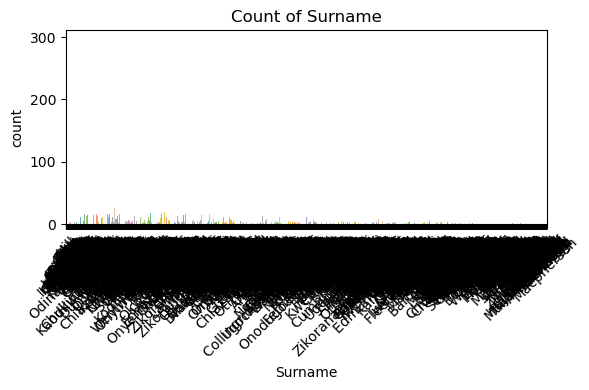

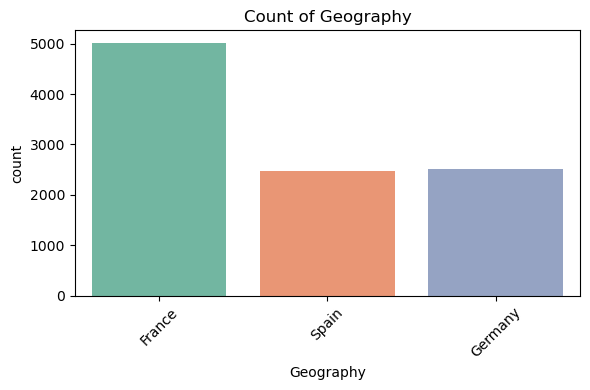

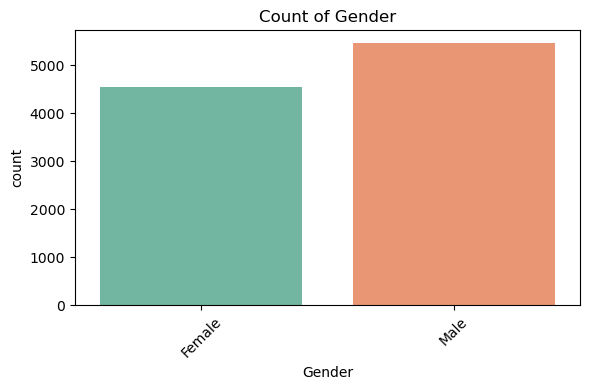

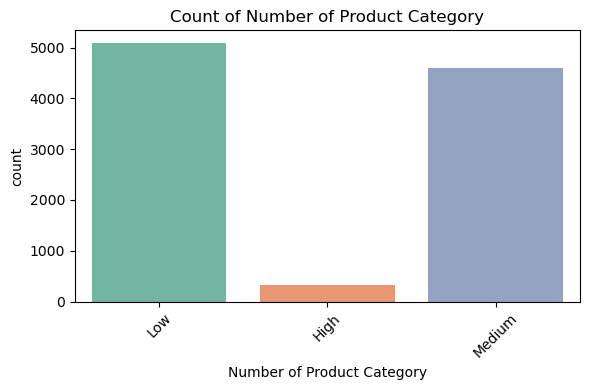

In [47]:

# Select only object or category columns

categorical_cols = merged_df.select_dtypes(include=['object']).columns

# Create a count plot for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sb.countplot(data=merged_df, x=col, hue=col, palette='Set2', legend=False)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




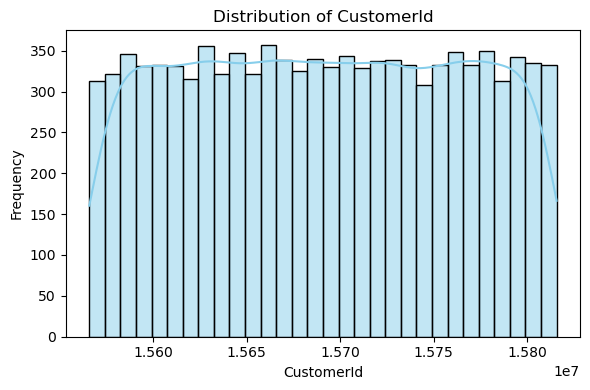

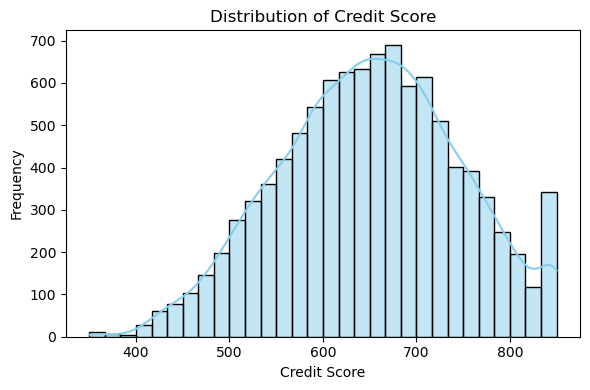

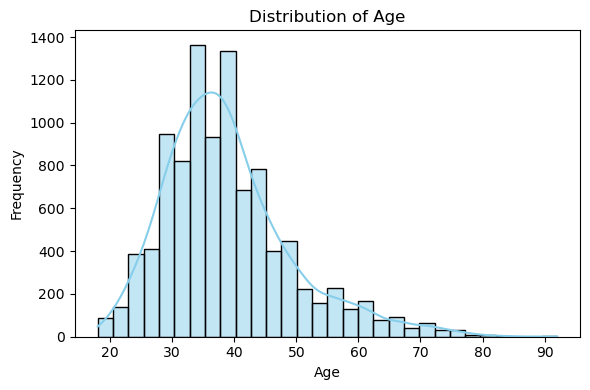

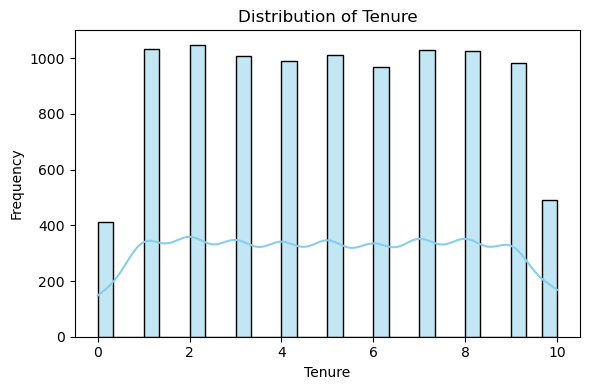

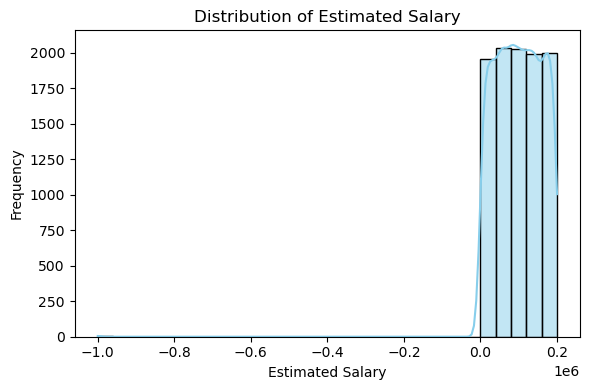

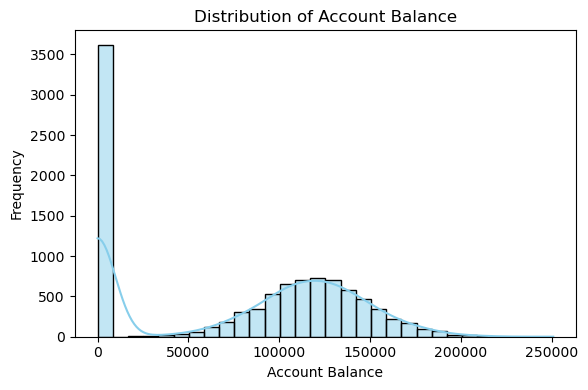

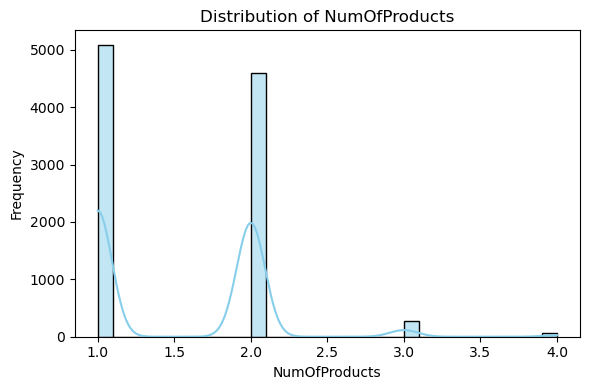

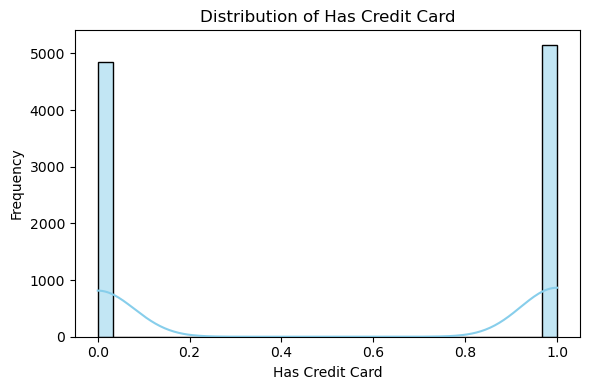

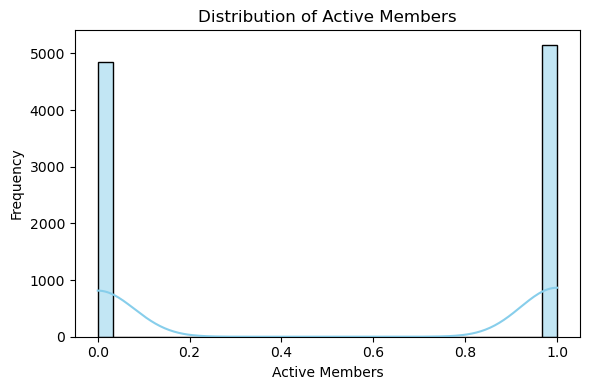

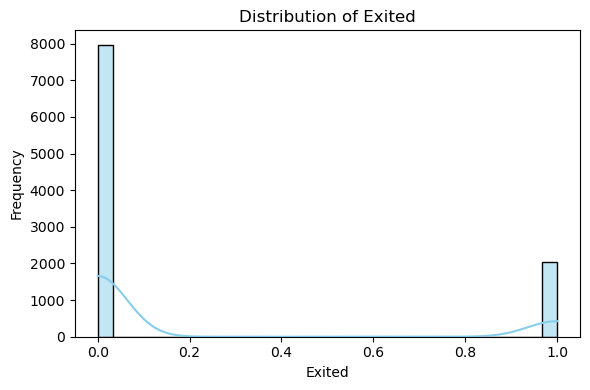

In [48]:
#histogram to see the distribution of data accross the numeric columns

numeric_cols = merged_df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sb.histplot(merged_df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()



In [49]:
merged_df

,CustomerId,Surname,Credit Score,Geography,Gender,Age,Tenure,Estimated Salary,Account Balance,NumOfProducts,Has Credit Card,Active Members,Exited,Number of Product Category
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,1,1,1,Low
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,1,1,0,Low
3,15619304,Onio,502,France,Female,42,8,113931.57,159660.80,3,0,0,1,High
4,15701354,Boni,699,France,Female,39,1,93826.63,0.00,2,0,0,0,Medium
5,15737888,Mitchell,850,Spain,Female,43,2,79084.10,125510.82,1,1,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,96270.64,0.00,2,0,0,0,Medium
9997,15569892,Johnstone,516,France,Male,35,10,101699.77,57369.61,1,1,1,0,Low
9998,15584532,Liu,709,France,Female,36,7,42085.58,0.00,1,1,1,1,Low
9999,15682355,Sabbatini,772,Germany,Male,42,3,92888.52,75075.31,2,0,0,1,Medium


In [50]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerId                  10000 non-null  int64  
 1   Surname                     10000 non-null  object 
 2   Credit Score                10000 non-null  int64  
 3   Geography                   10000 non-null  object 
 4   Gender                      10000 non-null  object 
 5   Age                         10000 non-null  int64  
 6   Tenure                      10000 non-null  int64  
 7   Estimated Salary            10000 non-null  float64
 8   Account Balance             10000 non-null  float64
 9   NumOfProducts               10000 non-null  int64  
 10  Has Credit Card             10000 non-null  int64  
 11  Active Members              10000 non-null  int64  
 12  Exited                      10000 non-null  int64  
 13  Number of Product Category  10000 no

In [51]:
#save cleaned csv file.
merged_df.to_csv('BankCustomer_cleaned.csv') 

visualization and analysis. 


1. customers demographics and the likelihood to churn. (age, gender and geography or region).
2. Customer financial standing and the likelihood to churn.
3. customers engagmenet patterns with the bank and likelihood to churn. 
 



In [52]:
#reusable helper function for count plots, histogram and barplot. 

def plot_count(merged_df, x_col, hue_col=None, title=None, palette='Set2', rotate_xticks=0, figsize=(7, 4)):
    plt.figure(figsize=figsize)
    sb.countplot(data=merged_df, x=x_col, hue=hue_col, palette=palette)
    plt.title(title if title else f'Count of {x_col}')
    plt.xlabel(x_col)
    plt.ylabel('Customer Count')

    if hue_col:
        unique_vals = merged_df[hue_col].unique()
        labels = [str(val) for val in sorted(unique_vals)]
        plt.legend(title=hue_col, labels=labels)

    plt.xticks(rotation=rotate_xticks)
    plt.tight_layout()
    sb.despine()
    plt.show() 

def plot_histogram(merged_df, col, hue_col=None, bins=30, kde=True, title=None, palette='Set2', figsize=(8, 5)):
    plt.figure(figsize=figsize)
    sb.histplot(data=merged_df, x=col, hue=hue_col, bins=bins, kde=kde, palette=palette)
    
    plt.title(title if title else f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Customer Count')
    
    if hue_col:
         plt.legend(title='Exited', labels=['0', '1'])
    
    plt.tight_layout()
    sb.despine()
    plt.show()
    



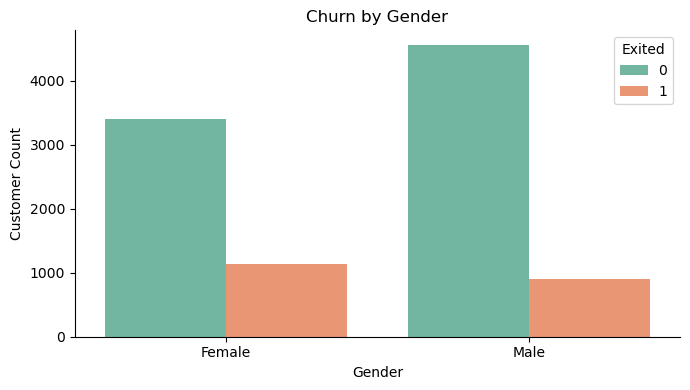

In [53]:
#churn count by gender
#count plot of gender vs exited / churn customers. is churn higher in males or females? 

plot_count(merged_df, x_col='Gender', hue_col='Exited', title='Churn by Gender')

In [54]:
plt.savefig('Churn by Gender.png')

<Figure size 640x480 with 0 Axes>

Insights from churn by Gender. 
- This plot helps identify which gender is more likely to churn. customers that are still in the bank  are represented by the numeric 1 and customers no longer in the bank are reprsented by the numeric 0.
- This plot shows that female customers are likely to churn to the bank (0) and male customers are more retained. Although it should be noted that the difference is not substantial.
- This result might suggest a need for targeted retention strategies for both gender especially the female gender.


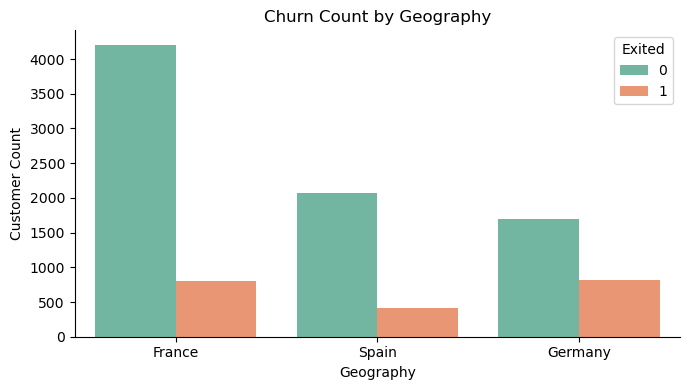

In [55]:
#churn count by geography
plot_count(merged_df, x_col='Geography', hue_col='Exited', title='Churn Count by Geography')

In [56]:
plt.savefig('Churn count by Geography.png')

<Figure size 640x480 with 0 Axes>

Insights:

- France has the largest customer base, but its churn count appears relatively lower compared to its size.
- Germany shows a higher proportion of churn, even though its total customer base is smaller.
- Spain appears more balanced.
- This suggests regional differences in customer satisfaction— Germany may need targeted customer retention strategies.



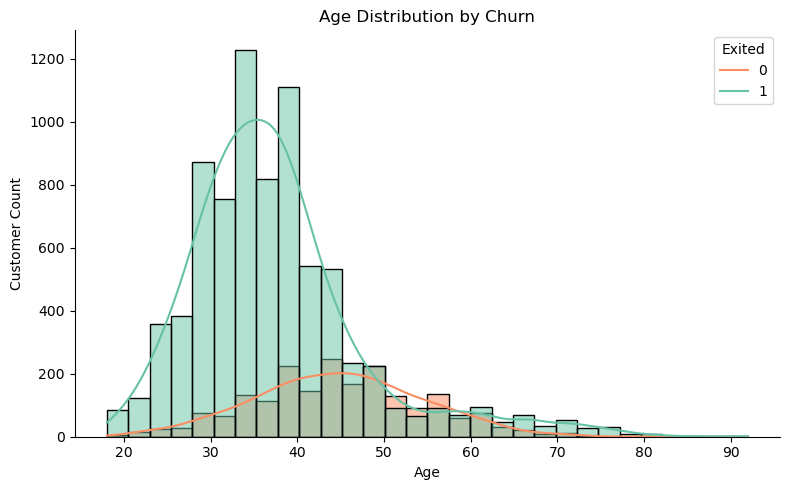

In [57]:
#customers who have exited the bank by age distribution.

plot_histogram(merged_df, col='Age', hue_col='Exited', title='Age Distribution by Churn') 



In [58]:
plt.savefig('Age distribution by churn.png')

<Figure size 640x480 with 0 Axes>

Insights:

- The bank customers are between 30 and 40 years old, but churn is more frequent in older age category.

- There is a significant spike in churn among customers aged 40–60+, suggesting they may feel underserved or dissatisfied or inadequately attended to.

- This also suggests that the bank might give more products to younger customers making customers in this age bracket feel less appreciated.

- The lack of such incentives or attention might make customers in those age bracket opt for banks that tend to their age groups. As customers in those age brackets tend to be careful or mindful where they invest their money.  

- Younger customers (under 30) are less likely to churn suggesting the bank needs more optimization or incentive or valuable products like insurance or loans that will encourage them to stay.

- This suggests to a possible need for age-centered engagement protocols or procedures, especially for older customer groups as this will affect the bank retention of those customers or even gaining them initially.

- This could affect the banks reputation / core values i.e discrimination in terms of age. 

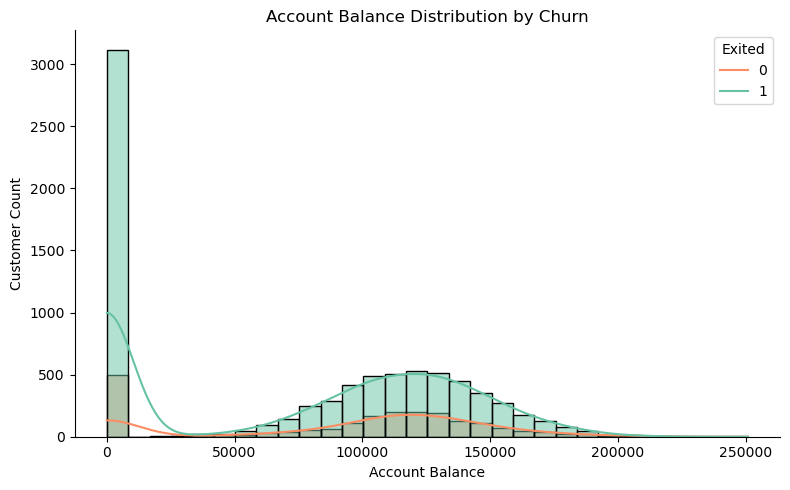

In [59]:
#Customer financial standing and the likelihood to churn.
#do customers with lower balances churn more?

plot_histogram(merged_df, col='Account Balance', hue_col='Exited', title='Account Balance Distribution by Churn') 

In [60]:
plt.savefig('Account Balance distribution by churn.png')

<Figure size 640x480 with 0 Axes>

Insights: 

1 There's a large spike in churn (Exited = 1) at zero account balance. This suggests that many customers who churned were not actively using their accounts. The bank should improve onboarding, monitor account activation, follow up on dormant users
2 Higher Balances = Lower Churn
As the account balance increases, the number of churned customers decreases.Customers with substantial balances are more likely to stay loyal, possibly due to: Better service tiers, Higher investment in the relationship, Use of multiple products, the bank may offer more incentive/products offers to customers who have higher balances to prevent them from leaving. To retain customers, the bank should offer loyalty perks or benefits, personalized financial planning
3. Mid-range Balances Show Mixed Behavior. In the middle of the distribution, churn exists but is less extreme. This segment may be more sensitive to customer experience or competitive offers from other banks. maybe the bank needs to review its products to target middle class earners and offers better customers experience. The bank should target them with retention campaigns or product cross-sell. 

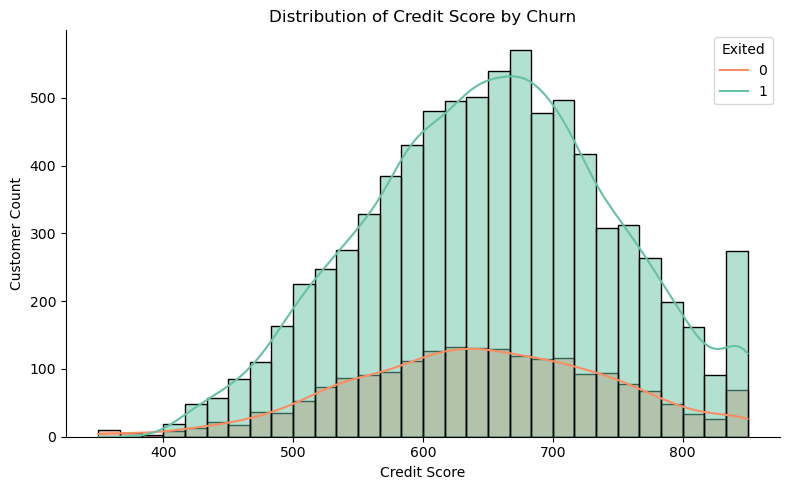

In [61]:
# distribution of credit score by churn.
#credit score patterns among existed customers.
# Are customers with lower credit score more likely to exist the bank. 

plot_histogram(merged_df, col='Credit Score', hue_col= 'Exited', title= 'Distribution of Credit Score by Churn')

In [62]:
plt.savefig('Distribution of Credit Score by Churn.png')

<Figure size 640x480 with 0 Axes>

insights
1. Even Distribution Across Credit Score. The chart shows that both churned and retained customers are spread across all credit score ranges.There’s no sharp peak or drop indicating a strong churn-driving credit score threshold. Creditworthiness alone doesn’t drive churn.
2. Low Credit Score Does Not Guarantee Churn. Even customers with lower credit scores (below 500) are not drastically overrepresented among those who exited.
3. High Credit Score Does Not Guarantee Loyalty. Surprisingly, high credit score customers (above 700) also show churn behavior. This suggests that trust or financial strength isn't enough to keep them — experience or product fit may matter more. Explore dissatisfaction with services or uncompetitive offerings

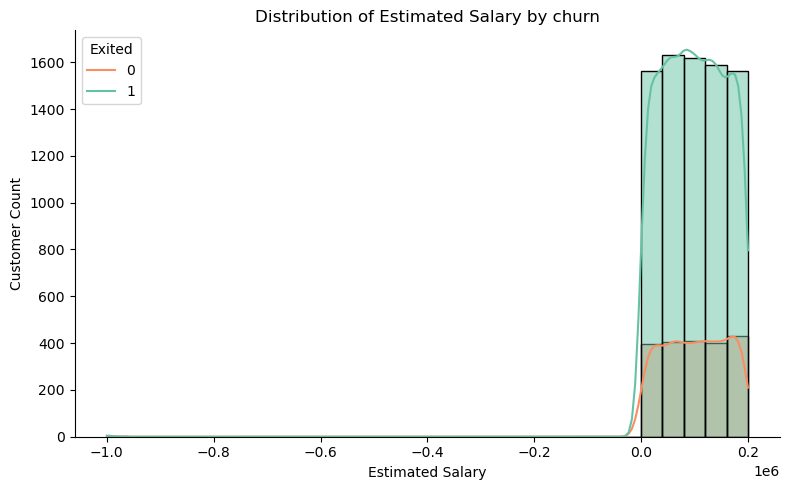

In [63]:
#are customers who earn more likely to churn.
#distribution of estimated salaray by churn 

plot_histogram(merged_df, col='Estimated Salary', hue_col= 'Exited', title= 'Distribution of Estimated Salary by churn') 

In [64]:
plt.savefig('Estimated Salary.png') 

<Figure size 640x480 with 0 Axes>

1. Even Distribution Across Salary Ranges
There doesn’t appear to be a strong correlation between estimated salary and churn.

Both customers who churned and stayed are spread fairly evenly across salary brackets.

2. Churn Occurs at All Income Levels
High earners (e.g., salaries > 100,000 euros) are just as likely to churn as low earners.

Suggests that financial capacity alone doesn’t prevent churn.

3. Middle Salary Brackets Show Slight Drop
In some datasets, you might notice slightly lower churn in middle-income brackets (50,000–70,000 euros) , possibly due to balanced expectations.

In [65]:
#Engagement patterns
#Do in active members churn more?
#count plot of active members vs exited. 

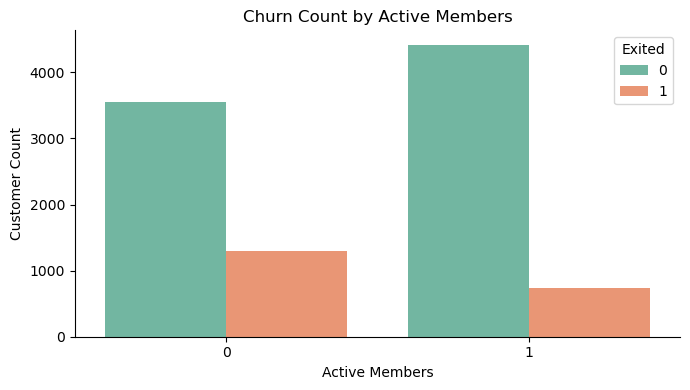

In [66]:
plot_count(merged_df, x_col='Active Members', hue_col='Exited', title='Churn Count by Active Members')  

In [67]:
plt.savefig('Active members.png')

<Figure size 640x480 with 0 Axes>

Insights
-non-active members in the bank tend to exist more than active members. This might be because of dissatisfaction from the bank or lack of attention to customer's service.
1. Non-Active Customers Churn More. Customers who are not active members (value = 0) show a much higher churn rate. Indicates strong correlation between customer engagement and retention.

2. Active Members Are More Loyal. Customers marked as active members (value = 1) churn significantly less.This suggests active participation or use of services is a protective factor against churn.

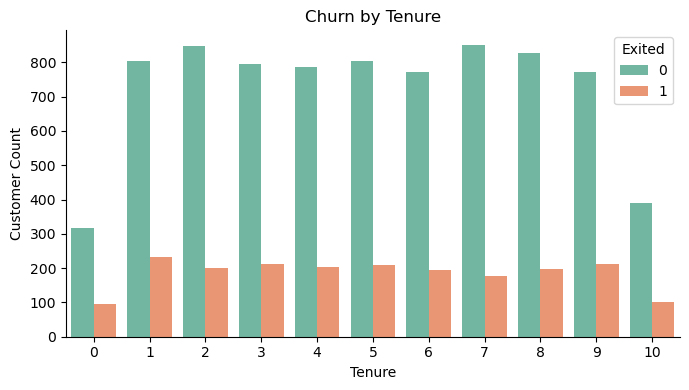

In [68]:
#tenure v churn
#this will help the bank determine whether long-term or new customers churn more.
plot_count(merged_df, x_col='Tenure', hue_col='Exited', title='Churn by Tenure')

In [69]:
plt.savefig('Tenure.png')

<Figure size 640x480 with 0 Axes>

Insights: 

1. Higher Churn at Mid Tenure. There's a spike in churn around 5–6 years of tenure. Suggests customer dissatisfaction or unmet expectations typically builds up during mid-term engagement.

2. Lower Churn at Low and High Tenure. Customers with 1–2 years and 9–10 years of tenure show lower churn. New customers might still be exploring services. Long-term customers may feel committed or satisfied.

3. Volatility Between Years. The churn rate isn't linear – it fluctuates, implying that other factors (e.g., product offerings, support experience) could influence decisions at certain tenure lengths.



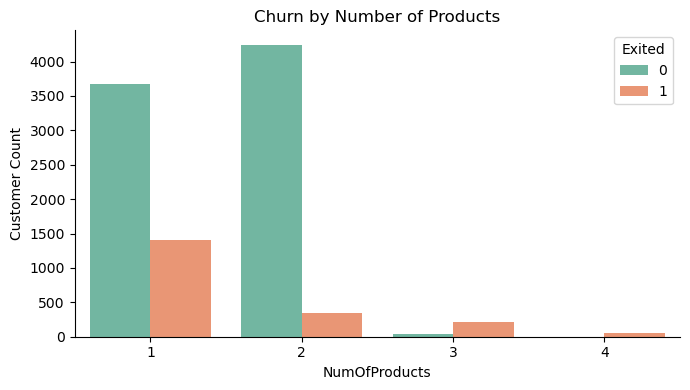

In [70]:
# How product variety impacts churn 
plot_count(merged_df, x_col='NumOfProducts', hue_col='Exited', title='Churn by Number of Products')

Insights
- The number of products does not have a correlation to whether a customer is being retained or not.
- most customers who have purchased at least one or two products are still in the bank.
- the bank need to understand why customers with 3 or 4 products leave. This can be because of poor loyalty points, customer service or lack of attention to details in the products given by the bank.
- This also shows that customers buying more product does not guarantee retention because customer with one and two products tend to stay when compared to customers who bought 3 or 4 products.
  
- This suggests the bank should focus of understanding why customers with one or two products tend to stay.
- The bank need to set optimization strategy that will encourage customers who have one or two to buy more eg they can have loyalty perks. This is because customers with 3 or 4 seem to be dissatisfied with the product or customer service or lack of loyalty perks. 

In [71]:
plt.savefig('NumOfproducts.png')  

<Figure size 640x480 with 0 Axes>

Recommendations.

1. Demographics-Based Recommendations
   
Gender

- Female are slightly more likely to leave. Create personalized offers for female customers. Collect feedback to understand their needs better.

Geography

- More customers leave from Germany. Survey German customers to find out why. Offer local deals or improve customer support in that region.

Age

- Older customers (40–60+) leave more. Offer age-specific products or services. Use loyalty programs and personal service to build trust.

 2. Financial Standing-Based Recommendations
    
Account Balance

Many customers with zero balance leave. Follow up to get new users active. Reward high-balance customers to keep them loyal.

Credit Score

Churn happens at all credit levels. Focus on customer experience, not just credit score. Use credit score with other data to better predict churn.

Estimated Salary

Income doesn’t predict loyalty. Provide great service to all customers, not just wealthy ones.

 3. Engagement-Based Recommendations
    
Active Membership

Inactive users churn more. Re-engage them with emails, offers, or benefits.

Tenure

Customers around 5–6 years are more likely to leave. Improve experience mid-way with special offers or check-ins.

Number of Products

Even customers with more products can churn. Understand why they leave. Make sure bundles offer real value and rewards.



Conclusion

Churn is caused by a mix of who the customer is, their finances, and how engaged they are.

- Keep customers by focusing on personalized service and active engagement.
- Don’t assume wealthy or long-term customers will stay—check in and offer value.
- Retention is about building strong, ongoing relationships—not just getting sign-ups.